In [1]:
#이제부턴 학습과 테스트셋을 나눠서 학습을 시킴 !! 
#반드시test데이터와 train데이터를 나눠야한다. 
#학습이 끝난다음에 test데이터를 통해 모델을 테스트한다.
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

'''
when lr = 1.5
0 5.73203 [[-0.30548954  1.22985029 -0.66033536]
 [-4.39069986  2.29670858  2.99386835]
 [-3.34510708  2.09743214 -0.80419564]]
1 23.1494 [[ 0.06951046  0.29449689 -0.0999819 ]
 [-1.95319986 -1.63627958  4.48935604]
 [-0.90760708 -1.65020132  0.50593793]]
2 27.2798 [[ 0.44451016  0.85699677 -1.03748143]
 [ 0.48429942  0.98872018 -0.57314301]
 [ 1.52989244  1.16229868 -4.74406147]]
3 8.668 [[ 0.12396193  0.61504567 -0.47498202]
 [ 0.22003263 -0.2470119   0.9268558 ]
 [ 0.96035379  0.41933775 -3.43156195]]
4 5.77111 [[-0.9524312   1.13037777  0.08607888]
 [-3.78651619  2.26245379  2.42393875]
 [-3.07170963  3.14037919 -2.12054014]]
5 inf [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
6 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
 ...
Prediction: [0 0 0]
Accuracy:  0.0
-------------------------------------------------
When lr = 1e-10
0 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
1 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
...
199 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
200 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
Prediction: [0 0 0]
Accuracy:  0.0
-------------------------------------------------
When lr = 0.1
0 5.73203 [[ 0.72881663  0.71536207 -1.18015325]
 [-0.57753736 -0.12988332  1.60729778]
 [ 0.48373488 -0.51433605 -2.02127004]]
1 3.318 [[ 0.66219079  0.74796319 -1.14612854]
 [-0.81948912  0.03000021  1.68936598]
 [ 0.23214608 -0.33772916 -1.94628811]]
...
199 0.672261 [[-1.15377033  0.28146935  1.13632679]
 [ 0.37484586  0.18958236  0.33544877]
 [-0.35609841 -0.43973011 -1.25604188]]
200 0.670909 [[-1.15885413  0.28058422  1.14229572]
 [ 0.37609792  0.19073224  0.33304682]
 [-0.35536593 -0.44033223 -1.2561723 ]]
Prediction: [2 2 2]
Accuracy:  1.0
'''

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 Cost:  0.15230925 
Prediction:
 [[ 1.6346191 ]
 [ 0.06613699]
 [ 0.3500818 ]
 [ 0.67072517]
 [ 0.61130744]
 [ 0.61464405]
 [ 0.23171967]
 [-0.1372836 ]]
1 Cost:  0.15230872 
Prediction:
 [[ 1.634618  ]
 [ 0.06613836]
 [ 0.35008252]
 [ 0.670725  ]
 [ 0.6113076 ]
 [ 0.6146443 ]
 [ 0.23171999]
 [-0.13728246]]
2 Cost:  0.15230817 
Prediction:
 [[ 1.6346169 ]
 [ 0.06613982]
 [ 0.35008317]
 [ 0.67072475]
 [ 0.61130774]
 [ 0.6146444 ]
 [ 0.23172033]
 [-0.13728121]]
3 Cost:  0.1523076 
Prediction:
 [[ 1.6346157 ]
 [ 0.06614128]
 [ 0.35

'\n0 Cost: 0.15230925 \nPrediction:\n [[ 1.6346191 ]\n [ 0.06613699]\n [ 0.3500818 ]\n [ 0.6707252 ]\n [ 0.61130744]\n [ 0.61464405]\n [ 0.23171967]\n [-0.1372836 ]]\n1 Cost: 0.15230872 \nPrediction:\n [[ 1.634618  ]\n [ 0.06613836]\n [ 0.35008252]\n [ 0.670725  ]\n [ 0.6113076 ]\n [ 0.6146443 ]\n [ 0.23172   ]\n [-0.13728246]]\n...\n99 Cost: 0.1522546 \nPrediction:\n [[ 1.6345041 ]\n [ 0.06627947]\n [ 0.35014683]\n [ 0.670706  ]\n [ 0.6113161 ]\n [ 0.61466044]\n [ 0.23175153]\n [-0.13716647]]\n100 Cost: 0.15225402 \nPrediction:\n [[ 1.6345029 ]\n [ 0.06628093]\n [ 0.35014752]\n [ 0.67070574]\n [ 0.61131614]\n [ 0.6146606 ]\n [ 0.23175186]\n [-0.13716528]]\n'

In [2]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


'''
0 Cost:  2.45533e+12
Prediction:
 [[-1104436.375]
 [-2224342.75 ]
 [-1749606.75 ]
 [-1226179.375]
 [-1445287.125]
 [-1457459.5  ]
 [-1335740.5  ]
 [-1700924.625]]
1 Cost:  2.69762e+27
Prediction:
 [[  3.66371490e+13]
 [  7.37543360e+13]
 [  5.80198785e+13]
 [  4.06716290e+13]
 [  4.79336847e+13]
 [  4.83371348e+13]
 [  4.43026590e+13]
 [  5.64060907e+13]]
2 Cost:  inf
Prediction:
 [[ -1.21438790e+21]
 [ -2.44468702e+21]
 [ -1.92314724e+21]
 [ -1.34811610e+21]
 [ -1.58882674e+21]
 [ -1.60219962e+21]
 [ -1.46847142e+21]
 [ -1.86965602e+21]]
3 Cost:  inf
Prediction:
 [[  4.02525216e+28]
 [  8.10324465e+28]
 [  6.37453079e+28]
 [  4.46851237e+28]
 [  5.26638074e+28]
 [  5.31070676e+28]
 [  4.86744608e+28]
 [  6.19722623e+28]]
4 Cost:  inf
Prediction:
 [[ -1.33422428e+36]
 [ -2.68593010e+36]
 [ -2.11292430e+36]
 [ -1.48114879e+36]
 [ -1.74561303e+36]
 [ -1.76030542e+36]
 [ -1.61338091e+36]
 [ -2.05415459e+36]]
5 Cost:  inf
Prediction:##여기서 무한대로 발산하기 시작함
 [[ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]]
6 Cost:  nan
Prediction:##이러면 학습을 포기하기 시작함 이런경우엔 learning rate가 너무 큰것이 아닌가 의심해봐야하는것
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
'''

0 Cost:  120882725000.0 
Prediction:
 [[246290.98]
 [494301.56]
 [389156.4 ]
 [273227.28]
 [321757.5 ]
 [324450.72]
 [297479.62]
 [378352.44]]
1 Cost:  1.328115e+26 
Prediction:
 [[-8.1292254e+12]
 [-1.6364964e+13]
 [-1.2873726e+13]
 [-9.0244142e+12]
 [-1.0635755e+13]
 [-1.0725273e+13]
 [-9.8300844e+12]
 [-1.2515651e+13]]
2 Cost:  inf 
Prediction:
 [[2.6945415e+20]
 [5.4243884e+20]
 [4.2671705e+20]
 [2.9912638e+20]
 [3.5253643e+20]
 [3.5550367e+20]
 [3.2583142e+20]
 [4.1484816e+20]]
3 Cost:  inf 
Prediction:
 [[-8.9314212e+27]
 [-1.7979867e+28]
 [-1.4144113e+28]
 [-9.9149473e+27]
 [-1.1685296e+28]
 [-1.1783649e+28]
 [-1.0800121e+28]
 [-1.3750701e+28]]
4 Cost:  inf 
Prediction:
 [[2.9604401e+35]
 [5.9596695e+35]
 [4.6882568e+35]
 [3.2864432e+35]
 [3.8732490e+35]
 [3.9058490e+35]
 [3.5798461e+35]
 [4.5578556e+35]]
5 Cost:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
6 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


'\n0 Cost:  2.45533e+12\nPrediction:\n [[-1104436.375]\n [-2224342.75 ]\n [-1749606.75 ]\n [-1226179.375]\n [-1445287.125]\n [-1457459.5  ]\n [-1335740.5  ]\n [-1700924.625]]\n1 Cost:  2.69762e+27\nPrediction:\n [[  3.66371490e+13]\n [  7.37543360e+13]\n [  5.80198785e+13]\n [  4.06716290e+13]\n [  4.79336847e+13]\n [  4.83371348e+13]\n [  4.43026590e+13]\n [  5.64060907e+13]]\n2 Cost:  inf\nPrediction:\n [[ -1.21438790e+21]\n [ -2.44468702e+21]\n [ -1.92314724e+21]\n [ -1.34811610e+21]\n [ -1.58882674e+21]\n [ -1.60219962e+21]\n [ -1.46847142e+21]\n [ -1.86965602e+21]]\n3 Cost:  inf\nPrediction:\n [[  4.02525216e+28]\n [  8.10324465e+28]\n [  6.37453079e+28]\n [  4.46851237e+28]\n [  5.26638074e+28]\n [  5.31070676e+28]\n [  4.86744608e+28]\n [  6.19722623e+28]]\n4 Cost:  inf\nPrediction:\n [[ -1.33422428e+36]\n [ -2.68593010e+36]\n [ -2.11292430e+36]\n [ -1.48114879e+36]\n [ -1.74561303e+36]\n [ -1.76030542e+36]\n [ -1.61338091e+36]\n [ -2.05415459e+36]]\n5 Cost:  inf\nPrediction:\n 

In [6]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


def min_max_scaler(data):
    numerator = data - np.min(data, 0)##행기준인데 열로보겠다. 
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)#분모가 0이되면안되니깝 


xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],###너무 크게 차이가 난다.!!! 값들이 이런경우 값이 밖으로 나가게된다.!!
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)
# very important. It does not work without it.
xy = min_max_scaler(xy)##이렇게 하면 어느방향으로 가더라도 발산하지않고 수렴하게되서 원하는 값을 얻을 수 있음
#즉 데이터의 선처리가 매우 중요하다 .
print(xy)
"""
[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]###minmax로 하게 되면 데이터의 결과가 이렇게 됨
"""
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)###이번엔 학습률을 너무 낮게 매긴경우

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        _, cost_val, hy_val = sess.run(
            [train, cost, hypothesis], feed_dict={X: x_data, Y: y_data}
        )
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

'''
0 Cost: 0.15230925 
Prediction:
 [[ 1.6346191 ]
 [ 0.06613699]
 [ 0.3500818 ]
 [ 0.6707252 ]
 [ 0.61130744]
 [ 0.61464405]
 [ 0.23171967]
 [-0.1372836 ]]
1 Cost: 0.15230872 
Prediction:
 [[ 1.634618  ]
 [ 0.06613836]
 [ 0.35008252]
 [ 0.670725  ]
 [ 0.6113076 ]
 [ 0.6146443 ]
 [ 0.23172   ]
 [-0.13728246]]
...
99 Cost: 0.1522546 
Prediction:
 [[ 1.6345041 ]
 [ 0.06627947]
 [ 0.35014683]
 [ 0.670706  ]
 [ 0.6113161 ]
 [ 0.61466044]
 [ 0.23175153]
 [-0.13716647]]
100 Cost: 0.15225402## 코스트가 너무작게 작아짐 이건 학습이너무 느리게 이러지고 있고 이는 local에 빠진것을 의미  
Prediction:
 [[ 1.6345029 
 [ 0.06628093]
 [ 0.35014752]
 [ 0.67070574]
 [ 0.61131614]
 [ 0.6146606 ]
 [ 0.23175186]
 [-0.13716528]]
'''

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 Cost:  0.56470245 
Prediction:
 [[-0.06572413]
 [-0.06795955]
 [-0.13650313]
 [-0.2401303 ]
 [-0.16231954]
 [-0.2708047 ]
 [-0.3281756 ]
 [-0.5223048 ]]
1 Cost:  0.5646596 
Prediction:
 [[-0.06568605]
 [-0.06792274]
 [-0.13647231]
 [-0.24010634]
 [-0.16229117]
 [-0.2707773 ]
 [-0.32815713]
 [-0.5222866 ]]
2 Cost:  0.5646168 
Prediction:
 [[-0.06564796]
 [-0.06788588]
 [-0.13644147]
 [-0.24008232]
 [-0.16226292]
 [-0.27075   ]
 [-0.32813865]
 [-0.5222684 ]]
3 Cost:  0.564574 
Prediction:
 [[-0.06560993]
 [-0.06784898]
 [-0.13641

'\n0 Cost: 0.15230925 \nPrediction:\n [[ 1.6346191 ]\n [ 0.06613699]\n [ 0.3500818 ]\n [ 0.6707252 ]\n [ 0.61130744]\n [ 0.61464405]\n [ 0.23171967]\n [-0.1372836 ]]\n1 Cost: 0.15230872 \nPrediction:\n [[ 1.634618  ]\n [ 0.06613836]\n [ 0.35008252]\n [ 0.670725  ]\n [ 0.6113076 ]\n [ 0.6146443 ]\n [ 0.23172   ]\n [-0.13728246]]\n...\n99 Cost: 0.1522546 \nPrediction:\n [[ 1.6345041 ]\n [ 0.06627947]\n [ 0.35014683]\n [ 0.670706  ]\n [ 0.6113161 ]\n [ 0.61466044]\n [ 0.23175153]\n [-0.13716647]]\n100 Cost: 0.15225402## 코스트가 너무작게 작아짐 이건 학습이너무 느리게 이러지고 있고 이는 local에 빠진것을 의미  \nPrediction:\n [[ 1.6345029 \n [ 0.06628093]\n [ 0.35014752]\n [ 0.67070574]\n [ 0.61131614]\n [ 0.6146606 ]\n [ 0.23175186]\n [-0.13716528]]\n'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 3.057904737
Epoch: 0002, Cost: 1.141675663
Epoch: 0003, Cost: 0.909058112
Epoch: 0004, Cost: 0.793338155
Epoch: 0005, Cost: 0.719723701
Epoch: 0006, Cost: 0.667118192
Epoch: 0007, Cost: 0.627397971
Epoch: 0008, Cost: 0.595497162
Epoch: 0009, Cost: 0.569353908
Epoch: 0010, Cost: 0.547884509
Epoch: 0011, Cost: 0.529179786
Epoch: 0012, Cost: 0.512841499
Epoch: 0013, Cost: 0.498917209
Epoch: 0014, Cost: 0.486648281
Epoch: 0015, Cost: 0.474862862
Learning finished
Accuracy:  0.8918
Label:  [3]
Prediction:  [3]


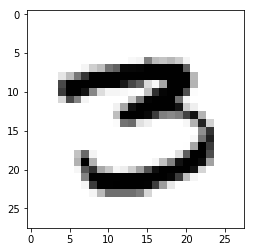

'\nEpoch: 0001, Cost: 2.826302672\nEpoch: 0002, Cost: 1.061668952\nEpoch: 0003, Cost: 0.838061315\nEpoch: 0004, Cost: 0.733232745\nEpoch: 0005, Cost: 0.669279885\nEpoch: 0006, Cost: 0.624611836\nEpoch: 0007, Cost: 0.591160344\nEpoch: 0008, Cost: 0.563868987\nEpoch: 0009, Cost: 0.541745171\nEpoch: 0010, Cost: 0.522673578\nEpoch: 0011, Cost: 0.506782325\nEpoch: 0012, Cost: 0.492447643\nEpoch: 0013, Cost: 0.479955837\nEpoch: 0014, Cost: 0.468893674\nEpoch: 0015, Cost: 0.458703488\nLearning finished\nAccuracy:  0.8951\n'

In [8]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10##10가지의 숫자를 분류하는 것 이기 때문에 10개 

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])#784개의 데이터를 입력 (28 x 28)
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])##10개를 집너넣음

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)##softmax를 사용하겠다.

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))##cross entropy를 사용하겠다.!!
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)##cost 최소화하자

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))####y의값과 예측한 값과 같은지 
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 15####너무큰 데이터셋이기때문에 한번에 100개씩 학습을 시키자 ##15번돌겠다 
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)##체데이터의 개수를 배치사이즈로 나눔 10000/100 

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):##15번돌것
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)#베치로 처리하겠다 100개씩
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))##epoch 전체 데이터 셋을 한번 학습시키는것 !! 1 epoch!!

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}##테스트셋을 넘겨줌
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()


'''
Epoch: 0001, Cost: 2.826302672
Epoch: 0002, Cost: 1.061668952
Epoch: 0003, Cost: 0.838061315
Epoch: 0004, Cost: 0.733232745
Epoch: 0005, Cost: 0.669279885
Epoch: 0006, Cost: 0.624611836
Epoch: 0007, Cost: 0.591160344
Epoch: 0008, Cost: 0.563868987
Epoch: 0009, Cost: 0.541745171
Epoch: 0010, Cost: 0.522673578
Epoch: 0011, Cost: 0.506782325
Epoch: 0012, Cost: 0.492447643
Epoch: 0013, Cost: 0.479955837
Epoch: 0014, Cost: 0.468893674
Epoch: 0015, Cost: 0.458703488
Learning finished
Accuracy:  0.8951
'''